# DISCRETE VARIABLES

In [416]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set()

## Simulate Flips of a Coin

We will simulate 10 flips of coin. Here, each coin flip is a bernouli trial with `p = 0.5`, `1 - p = 0.5` where `p = probability of heads`. Thus, we are performing 10 Bernouli Trials.

For each random number generated between (0, 1), a `value < 0.5` ===> heads, a `value  >= 0.5` ===> tails

### Generating Random Numbers:

In [417]:
# Seed random generator
np.random.seed(10)

# Generate 10 flips of a coin
random_nums = np.random.random(size=10)
random_nums

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [418]:
# Determinne which flips are heads
heads = random_nums < 0.5
heads

array([False,  True, False, False,  True,  True,  True, False,  True,
        True])

In [419]:
# Count number of heads
np.sum(heads)

6

Ok so we got 6 flips out of 10 to be heads.

### Simulating Probabilities:

Suppose we were to repeat this experiment 10000 times and then ask: `What is the probability of getting exactly 8 heads out of 10?`

In [420]:
# Count num occurrences where 8/10 flips = heads. Repeat 10000 times
num_eight_heads = 0
for i in range(10000):
    random_nums = np.random.random(size=10) # Generate 10 random flips
    if np.sum( random_nums < 0.5 ) == 8: # Check if num heads == 8
        num_eight_heads += 1

# Print simulated probability of getting 8 heads out of 10 flips
print(num_eight_heads / 10000)

0.0433


### PDF (Histogram):
Let's repeat the above, and look at the `distribution of head counts` for the experiment above.

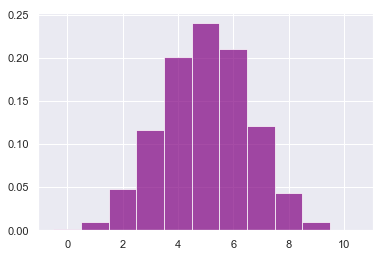

In [421]:
# Simulate 10 coin flips. Repeat 10000 times. Plot distribution of heads.
num_heads = np.empty(10000)
for i in range(10000):
    random_nums = np.random.random(size=10) # Generate 10 random flips
    num_heads[i] = np.sum( random_nums < 0.5) # Save num heads

# Print distribution as a histogram
plt.hist(num_heads, bins=np.arange(-0.5, 10 + 1.5), color='purple', alpha=0.7, density=True)
plt.show()

### ECDF (Empirical Cumulative Distribution Function):
Let's also plot a CDF of the data above.

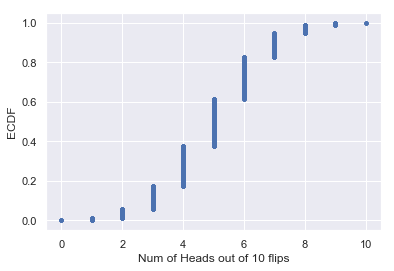

In [422]:
x = np.sort(num_heads)
y = np.arange(1, len(num_heads) + 1)/ len(num_heads)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Num of Heads out of 10 flips')
plt.ylabel('ECDF')
plt.show()

### Binomial Distribution:
We can clearly see a `binomial distribution`, which is what we expect.

Why? Because it shows us the number `r` or successes in `n` bernouli trials (10 in this case).

The distribution looks symmetric w/ repsect to the y-axis, and is the discrete version of the `Normal Distribution`.

The `np.random` module has a `binomial` method which allows us to perform our previous work more simply.

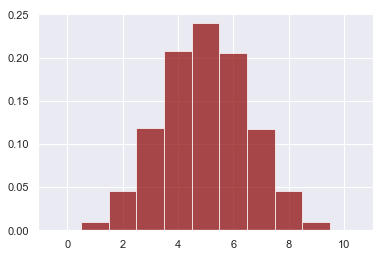

In [423]:
num_heads = np.random.binomial(10, 0.5, 10000)
plt.hist(num_heads, bins=np.arange(-0.5, 10 + 1.5), color='darkred', alpha=0.7, density=True)
plt.show()

## Visits on a Website

How can I look at the distribution of clicks on a website?

Clicks of a website are an example of a `poisson process`: where the timing of one event is completely independent of when the previous event occured.

### Poisson Distribution:
Possion processes have a Poisson Distribution: The number `r` of arrivals of a Poisson process in a given time interval with average rate of `λ` arrvals per interval. The `Poisson Distribution` is the limit of the `Binomial Distribution` for large # of trials `n`, and low probability `p`, i.e. for rare events.

`Suppose the avg is 6 clicks per hour for a given website. What does the PDF look like then?`

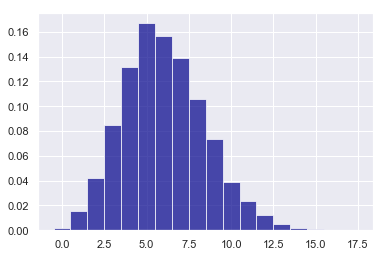

In [424]:
# Poisson Distribution where λ = 6, n = 10000.
num_visits = np.random.poisson(6, size=10000)
plt.hist(num_visits, bins=np.arange(-0.5, max(num_visits) + 1.5), color='darkblue', alpha=0.7, density=True)
plt.show()

And here is the CDF from before:

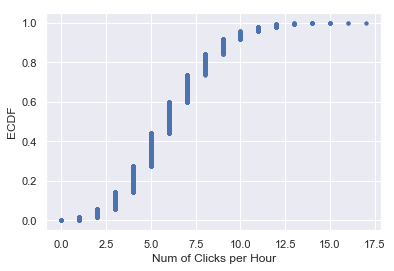

In [425]:
# ECDF of the distribution above (6 clicks per hour)
x = np.sort(num_visits)
y = np.arange(1, len(num_visits) + 1)/ len(num_visits)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Num of Clicks per Hour')
plt.ylabel('ECDF')
plt.show()

`What is the probability of getting >= 10 clicks per hour, given that the average is 6 clicks per hour?`

In [426]:
# Calculate p(>= 10 clicks per hour)
np.sum(num_visits >= 10) / len(num_visits)

0.0827

# CONTINUOUS VARIABLES

`Continous variables`, have a `PMF` instead of a `PDF`. The PMF is displayed as a curve (instead of a histogram), with probabilities represented as areas beneath the curve. In many cases the distribution will be `Normal`, which is really the analogous version of the `Binomial Distribution`.

## Speed of Light Data
We will be using data from Michelson's Speed of Light experiments.

### Checking for Normality
This can be done in many ways. We will compare the theoretical ECDF of the normal distribution vs the distribution of the actual measurements.

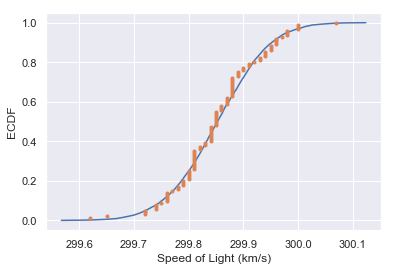

In [427]:
# Read in the data
import json
with open('data/speed_of_light.json') as f:
    data = json.load(f)
light_speeds = [item for sublist in data for item in sublist]

# Generate theoretical data for normal distribution
mean = np.mean(light_speeds)
std = np.std(light_speeds)
light_samples = np.random.normal(mean, std, size=10000)

# Plot ECDF of theoretical data
x_theor = np.sort(light_samples)
y_theor = np.arange(1, len(light_samples) + 1)/ len(light_samples)
plt.plot(x_theor, y_theor)

# Plot ECDF of Actual Data
x = np.sort(light_speeds)
y = np.arange(1, len(light_speeds) + 1)/ len(light_speeds)
plt.plot(x, y, marker='.', linestyle='none')

# Label and display
plt.xlabel('Speed of Light (km/s)')
plt.ylabel('ECDF')
plt.show()

### Simulated Probabilities:

Suppose we ask: `What is the probability of seeing a light measurement >= 300 km/s?`

In [428]:
np.sum(light_samples >= 300) / len(light_samples)

0.0308

## Asteroid Impacts

Suppose we are analyzing the `average time` between successive asteroid impacts.

Recall that are asteroid impacts are an example of a `poisson process`.

### Exponential Distribution

The waiting time `t` between intervals of a `Poisson Process` is exponentially distributed, with one parameter, the `mean waiting time`.

Suppose the average waiting time between successive impacts is `100 days`. `What does the theoretical PMF look like?`

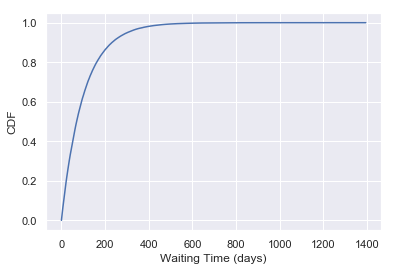

In [429]:
# Generate 100000 samples
asteroid_samples = np.random.exponential(100, 100000)

# Plot CDF of exponential distribution
x_theor = np.sort(asteroid_samples)
y_theor = np.arange(1, len(asteroid_samples) + 1) / len(asteroid_samples)
plt.plot(x_theor, y_theor)
plt.xlabel('Waiting Time (days)')
plt.ylabel('CDF')
plt.show()

Based on the assumptions above, what is the probability of:
1. Two impacts happening `10 days` apart or less?
2. Two impacts happening `2 years` apart or more?

In [430]:
# Computing probabilities of two poisson processes occurring within a given timeframe.
ten_days = np.sum(asteroid_samples <= 10) / len(asteroid_samples)
two_years = np.sum(asteroid_samples >= 730) / len(asteroid_samples)
print('10 days or less: ', ten_days)
print('Two years or more: ', two_years)

10 days or less:  0.09655
Two years or more:  0.0007


# OPTIMAL PARAMETERS

These are the parameters that best fit the data, **which are typically computed from the data itself.**

From above, suppose that the `mean waiting time` was `100 days` between two impacts.

What if we diverted off this optimal value? What would the plot look like?

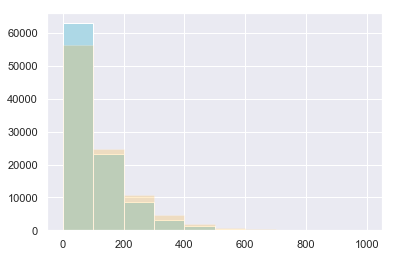

In [431]:
# Plotting two exponential distributions with 20% difference in mean.
twenty_percent_dev = np.random.exponential(120, 100000)

plt.hist(x_theor, bins=(np.arange(0, 11) * 100), color='lightblue')
plt.hist(x_twenty, bins=(np.arange(0, 11) * 100), color='orange', alpha=0.2)
plt.show()

The difference doesn't seem staggering here, but it is defintely noticeable.

With different distributions and different parameters, the results could deviate much more.

## Car Data

Let's find optimal parameters on a car dataset. Specifically, we want to know if `city mpg` and `highway mpg` are correlated.

In [432]:
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
                   header=None)

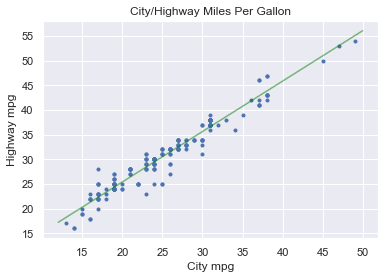

In [433]:
# Plot City mpg vs Highway mpg
plt.plot(cars[23], cars[24], marker='.', linestyle='none')

# Calculate Slope, intercept, and corr coefficient.
a, b = np.polyfit(cars[23], cars[24], 1)
r = np.corrcoef(cars[23], cars[24])[0,1]

# Display line of best fit
x = np.array([12, 50])
y = (x * a) + b
plt.plot(x, y, color='green', alpha=0.5)

# Label and display
plt.xlabel('City mpg')
plt.ylabel('Highway mpg')
plt.title('City/Highway Miles Per Gallon')
plt.show()

In [434]:
# Print slope, intercept, and corr coefficient.
print('Slope: ', a)
print('Intercept: ', b)
print('Corr Coeff: ', r)

Slope:  1.0224568127472233
Intercept:  4.965357454131003
Corr Coeff:  0.9713370423425061


Here, `np.polyfit()` calculated the optimal parameters for us. In real datasets, the data will rarely look as perfect as this. Nevertheless, from the plot above, we can clearly see a strong linear relationship between `city mpg` and `highway mpg`.

# BOOTSRTAP CONFIDENCE INTERVALS

Typically, we want to know what results we'd get if we were to collect new data, and repeat the experiment again, and again, and again.

This can be done in a few ways. One way is to resample your existing data, thus creating a `bootstrap sample`. A `bootstrap replicate` is then the statistic that is computed from the resampled data.

To resample our data, we will use: `np.random.choice()`. We'll work with Michelson's speed of light measurements again.

In [435]:
bootstrap_sample = np.random.choice(light_speeds, size=len(light_speeds))
print('Original Mean: ', np.mean(light_speeds))
print('Sample Mean: ', np.mean(bootstrap_sample))

Original Mean:  299.8524
Sample Mean:  299.8516


### Visualizing Bootstrap Samples
Let's visualize 100 samples of Michelson's light speed data and plot their ECDFs against the original ECDF.

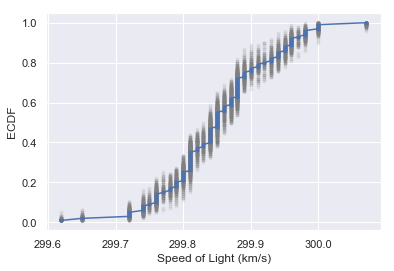

In [436]:
# Generate 100 samples and display their ECDFs
for i in range(100) :
    bs_sample = np.random.choice(light_speeds, size=len(light_speeds))
    x = np.sort(bs_sample)
    y = np.arange(1, len(bs_sample) + 1)/ len(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# Overlay ECDF of original data
x = np.sort(light_speeds)
y = np.arange(1, len(light_speeds) + 1)/ len(light_speeds)
plt.plot(x, y, marker='.')

# Label and display
plt.xlabel('Speed of Light (km/s)')
plt.ylabel('ECDF')
plt.show()

Next, let's look at a histogram of the mean speed of light of 10000 replicates.

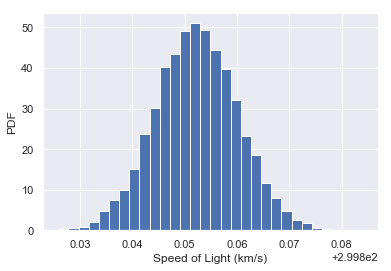

In [437]:
# Create 10000 replicates and store their means
replicate_means = np.empty(10000)
for i in range(10000) :
    replicate = np.random.choice(light_speeds, len(light_speeds))
    replicate_means[i] = np.mean(replicate)
    
# Plot data as a histogram
plt.hist(replicate_means, bins=30, density=True)
plt.xlabel('Speed of Light (km/s)')
plt.ylabel('PDF')
plt.show()

### Confidence intervals

We can create confidence intervals using the samples above and the `np.percentile()` method.

In [438]:
# Create 95% and 99% confidence intervals
print('95% Confidence Interval: ', np.percentile(replicate_means, [2.5, 97.5]))
print('99% Confidence Interval: ', np.percentile(replicate_means, [0.5, 99.5]))

95% Confidence Interval:  [299.8368 299.8678]
99% Confidence Interval:  [299.8326    299.8725005]


### Pairs Bootstrap

Suppose we want to generate bootstrap replicates for our car data. Each car has an associated `city mpg` and `highway mpg`. Since we can't extract just one or the other, we need to extract them as pairs. This is known as a `Pairs Bootstrap`.

We do this by using `np.random.choice()` on the indices and then we slice the dataframe on those indices.

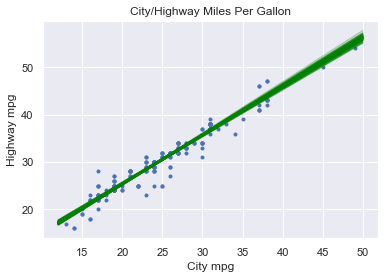

In [439]:
# Plot City mpg vs Highway mpg
plt.plot(cars[23], cars[24], marker='.', linestyle='none')

# Calculate slope and intercept
a, b = np.polyfit(cars[23], cars[24], 1)

# Display line of best fit
x = np.array([12, 50])
y = (x * a) + b
plt.plot(x, y, color='green', alpha=0.5)

# Perform 100 pairs bootstrap and plot the line of best fit
indices = np.arange(0, len(cars))
slopes = np.empty(100)
intercepts = np.empty(100)
for i in range(100) :
    sample_indices = np.random.choice(indices, len(indices))
    slopes[i], intercepts[i] = np.polyfit(cars.loc[sample_indices, 23], cars.loc[sample_indices, 24], 1)
    y = (x * slopes[i]) + intercepts[i]
    plt.plot(x, y, color='green', alpha=0.3)
    
# Label and display
plt.xlabel('City mpg')
plt.ylabel('Highway mpg')
plt.title('City/Highway Miles Per Gallon')
plt.show()

Let's plot a histogram of the slope distributions.

(array([ 4.,  8.,  8., 19., 24., 19., 12.,  4.,  1.,  1.]),
 array([0.98537138, 0.99493481, 1.00449823, 1.01406165, 1.02362508,
        1.0331885 , 1.04275193, 1.05231535, 1.06187877, 1.0714422 ,
        1.08100562]),
 <a list of 10 Patch objects>)

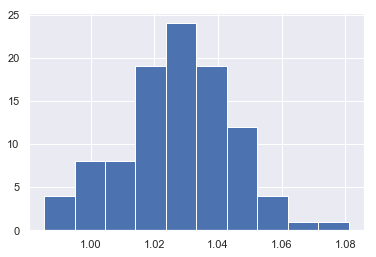

In [440]:
plt.hist(slopes)

In [ ]:
Let's also calculate the 95% confidence interval.

In [441]:
print('95% Confidence Interval: ', np.percentile(slopes, [2.5, 97.5]))

95% Confidence Interval:  [0.99199745 1.05943641]


# HYPOTHESIS TESTING

Often, we want to test if two random variables are independent (have the same probability distribution). For example, we may want to see if the distribution of `horsepower` is independent of `car model`.

Suppose we want to see if the distribution of `horsepower` is independent accross `Nissan` and `Mazda` cars. To do this, we'll mix all the data points together, then assign the first half as `Nissan`, and the second half as `Mazda`.

In [486]:
# Select Nissan and Mazda Cars
nissan_cars = cars[cars[2] == 'nissan'][21].values.astype('int')
mazda_cars = cars[cars[2] == 'mazda'][21].values.astype('int')

# Concatenate horsepowers of both cars
horsepowers = np.concatenate((nissan_cars, mazda_cars))

First, let's plot the ECDFs of each car.

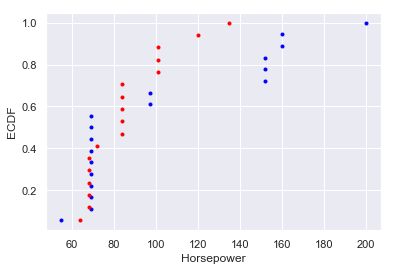

In [505]:
# ECDF of Nissan cars
x_nissan = np.sort(nissan_cars)
y_nissan = np.arange(1, len(x_nissan) + 1) / len(x_nissan)
plt.plot(x_nissan, y_nissan, marker='.', linestyle='none', color='blue')

# ECDF of Nissan cars
x_mazda = np.sort(mazda_cars)
y_mazda = np.arange(1, len(mazda_cars) + 1) / len(mazda_cars)
plt.plot(x_mazda, y_mazda, marker='.', linestyle='none', color='red')

plt.xlabel('Horsepower')
plt.ylabel('ECDF')
plt.show()

We can't tell quite yet if `horsepower` is indpendent accross car models. Now, let's compute the empirical difference between the means of both car models.

In [498]:
# Compute empirical values
empirical_diff = np.mean(nissan_cars) - np.mean(mazda_cars)
empirical_diff

17.026143790849673

Finally, let's simulate `10000` permutations and calculate the `p-value` for seeing a `mean` as extreme as the one from the original data.

In [497]:
# Sample differences
diff_means = np.empty(10000)
for i in range(10000) :
    # Generate permutation of horse powers
    horsepowers_permutation = np.random.permutation(horsepowers)

    # Assign first half as Nissan and second half as Mazda
    nissan_perm = horsepowers_permutation[:18]
    mazda_perm = horsepowers_permutation[18:]
    
    diff_means[i] = np.mean(nissan_perm) - np.mean(mazda_perm)

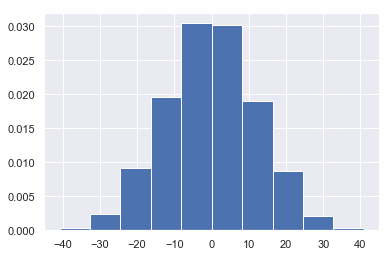

In [500]:
plt.hist(diff_means, density=True)
plt.show()

In [501]:
np.sum(diff_means >= empirical_diff) / len(diff_means)

0.0823

We can see a `p-value of 0.0823`, so assuming an `alpha of 0.05`, we `fail to reject the null hypothesis`.